# Data Processor

In [1]:
import utils
import earthpy.plot as ep
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/'
bands =  ['B4','B3','B2']

# Dict of the images.
images = utils.load_landsat_image(BASE_DIR, bands)

Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200819T165901_20200819T170647_T15TXG_19Aug2020_B4.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200819T165901_20200819T170647_T15TXG_19Aug2020_B3.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200819T165901_20200819T170647_T15TXG_19Aug2020_B2.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200915T164931_20200915T165800_T15TXG_15Sep2020_B4.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200915T164931_20200915T165800_T15TXG_15Sep2020_B3.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200915T164931_20200915T165800_T15TXG_15Sep2020_B2.tif
Opening file /home/aargaez/github/Plant-Growth

In [3]:
# Images dicitionary.
print(f'The total length of the images dictionary is {len(images)}')

The total length of the images dictionary is 34


In [4]:
# Array with the ID of the images.
keys_lst = list(images.keys())

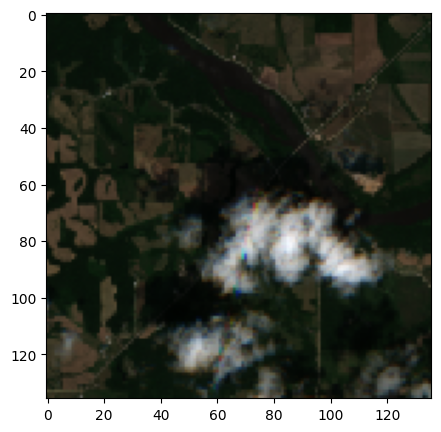

In [5]:
# Select just one image.
image = images[keys_lst[0]]
image = images['20200617T16490120200617T170013T15TXG17Jun2020']
# Display the image.
utils.display_rgb(image)

In [6]:
image

{'B4': array([[ 255,  288,  264, ...,  998, 1024,  944],
        [ 255,  263,  255, ...,  506,  874,  911],
        [ 239,  260,  273, ...,  651,  488,  542],
        ...,
        [2520, 2149, 2033, ..., 2388, 2765, 3104],
        [1443, 1531, 1572, ..., 1596, 1995, 2926],
        [1222, 1659, 1848, ...,  604, 1078, 2758]], dtype=int32),
 'B3': array([[ 567,  623,  609, ..., 1074, 1118, 1081],
        [ 580,  614,  533, ...,  733, 1007, 1058],
        [ 554,  591,  609, ...,  863,  773,  956],
        ...,
        [2448, 2132, 2035, ..., 2741, 3064, 3258],
        [1448, 1501, 1432, ..., 2321, 2700, 3165],
        [1298, 1554, 1664, ...,  973, 1541, 3132]], dtype=int32),
 'B2': array([[ 308,  329,  325, ...,  718,  721,  670],
        [ 318,  325,  291, ...,  412,  644,  677],
        [ 289,  312,  316, ...,  510,  417,  512],
        ...,
        [1678, 1416, 1397, ..., 2796, 2936, 2930],
        [ 902, 1017,  942, ..., 2453, 2825, 3118],
        [ 810, 1034, 1146, ..., 1032, 1565, 29

In [7]:
# Traspose as np.stack
img_stack = np.stack([image['B4'], image['B3'], image['B2']], axis=0)

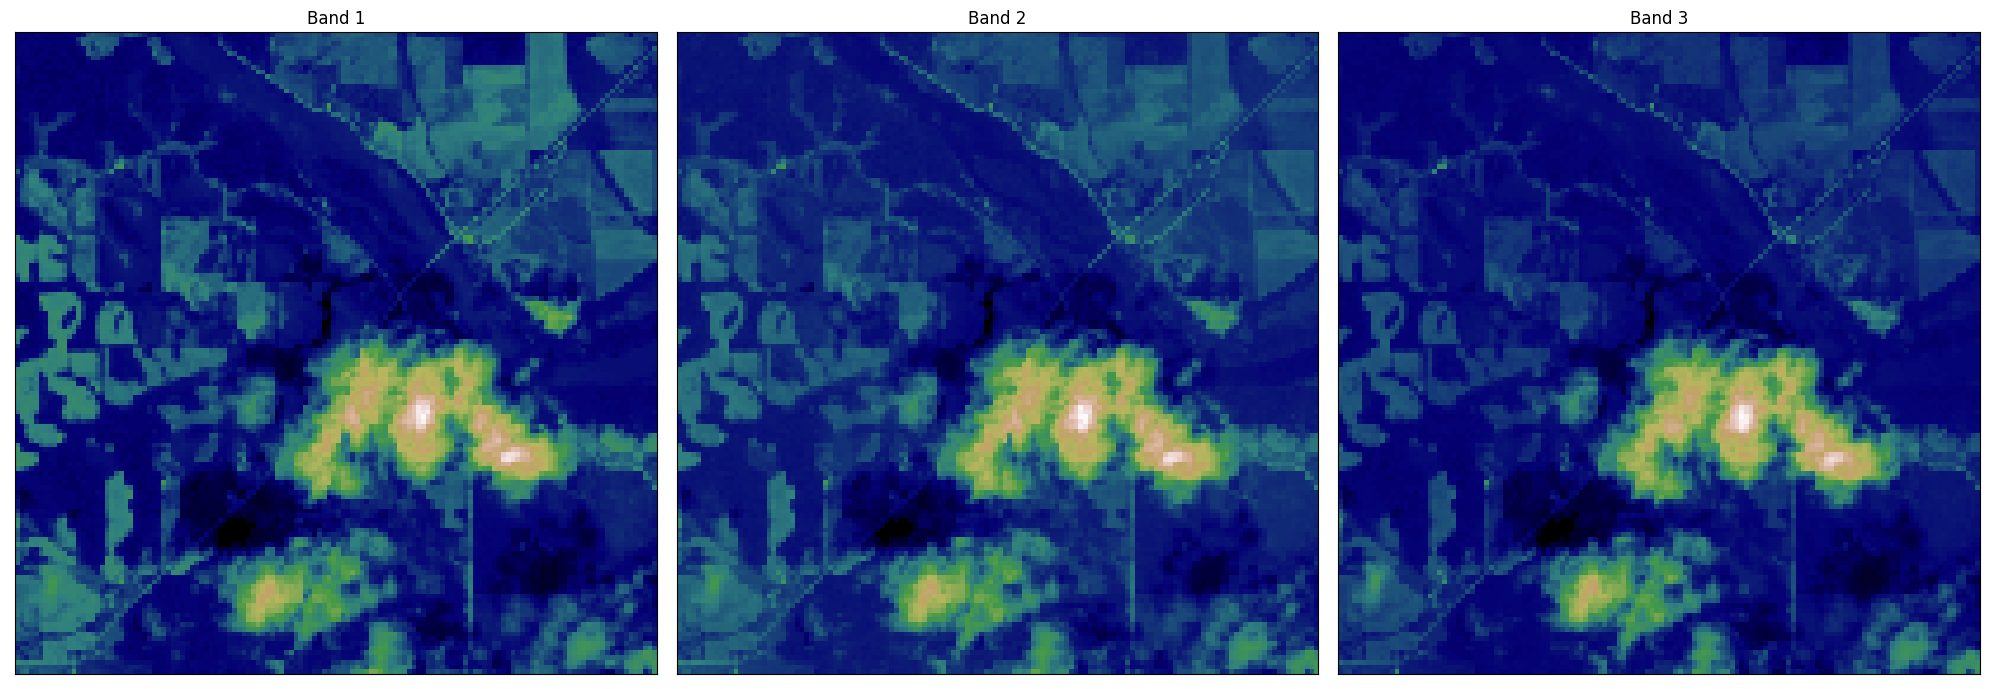

In [8]:
ep.plot_bands(img_stack, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 3, 
              cbar = False)
plt.show()

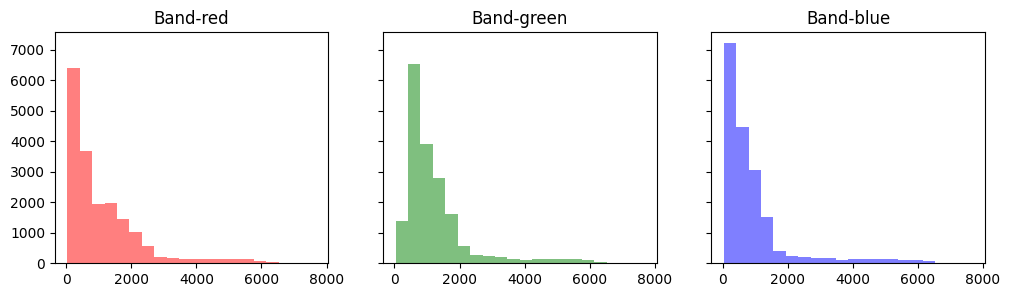

In [9]:
colors = ['red', 'green', 'blue']

ep.hist(img_stack, 
        colors = colors,
        title=[f'Band-{i}' for i in colors], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 3))

plt.show()

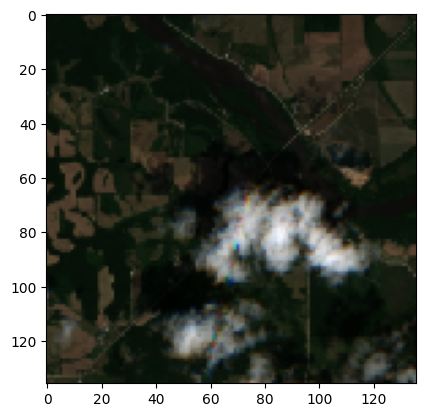

In [11]:
# Scale the data to [0, 255] to show as an RGB image.
eight_bit_image = utils.convert_to_eight_bits(image)
plt.imshow(eight_bit_image)
plt.show()